<a href="https://colab.research.google.com/github/Mbigdeli2003/Reinforcement-Learning/blob/main/RL_Final_Project__Epsilon_DoubleQ_Fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning Final Project Fall 2023- Double_Q with epsilon for explore

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import gym
from collections import deque
import numpy as np
import argparse
import os
import time

### 6*8 Table
### Goal Reward=0
### each step Reward=-1
### Hole Reward=-10

In [2]:
# Define Class
class Goal_vs_Hole_v0():
   pass

## Define Rewards

In [24]:
def init_reward_table(self):
    self.col=4
    self.row=48
    self.reward_table =-1*np.ones([self.row, self.col])

# Holes
    self.reward_table [9,2]=-100
    self.reward_table [17,2]=-100
    self.reward_table [25,2]=-100
    self.reward_table [3,2]=-100
    self.reward_table [11,0]=-100
    self.reward_table [11,2]=-100
    self.reward_table [13,0]=-100
    self.reward_table [19,0]=-100
    self.reward_table [27,0]=-100
    self.reward_table [5,0]=-100
    self.reward_table [2,1]=-100
    self.reward_table [20,3]=-100
    self.reward_table [34,3]=-100

    self.reward_table [6,2]=7
    for i in range(0,48):
        for j in range(0,4):
      ####Edges
            if (j==0) and (i==0 or i==8 or i==16 or i==24 or i==32 or i==40):
               self.reward_table[i,j]==[]

            if (j==3) and (i==0 or i==1 or i==2 or i==3 or i==4 or i==5 or i==6 or i==7):
               self.reward_table[i,j]==[]

            if (j==2) and (i==23 or i==31 or i==39 or i==47):
               self.reward_table[i,j]==[]

            if (j==1) and (i==40 or i==41 or i==42 or i==43 or i==44 or i==45 or i==46 or i==47):
              self.reward_table[i,j]==[]
### Considering Walls in table

    self.reward_table[13,2]==[]
    self.reward_table[22,3]==[]
    self.reward_table[23,3]==[]
    self.reward_table[6,1]==[]

###Walls
    self.reward_table[14,0]==[]
    self.reward_table[14,1]==[]
    self.reward_table[14,2]==[]
    self.reward_table[14,3]==[]

    self.reward_table[15,0]==[]
    self.reward_table[15,1]==[]
    self.reward_table[15,2]==[]
    self.reward_table[15,3]==[]



Goal_vs_Hole_v0.init_reward_table =init_reward_table

## Action Space

In [4]:
""""
Table
0 -Left 1-Down 2-Right 3-Up
𝑆0	𝑆1	𝑆2	𝑆3	𝑆4	𝑆5	𝑆6	𝑆7
𝑆8	𝑆9	𝑆10	𝑆11	𝑆12	𝑆13	𝑆14	𝑆15
𝑆16	𝑆17	𝑆18	𝑆19	𝑆20	𝑆21	𝑆22	𝑆23
𝑆24	𝑆25	𝑆26	𝑆27	𝑆28	𝑆29	𝑆30	𝑆31
𝑆32	𝑆33	𝑆34	𝑆35	𝑆36	𝑆37	𝑆38	𝑆39
𝑆40	𝑆41	𝑆42	𝑆43	𝑆44	𝑆45	𝑆46	𝑆47
"""
def init_transition_table(self):
    self.row=48
    self.col=4
    #self.action_space=np.arange(0,4,1)
    #self.observation_space=np.arange(0,48,1)
    #self.observation_terminal=[4,10,12,18,26]
    #self.observation_terminal=[0,1,2,3,5,6,7,8,9,11,13,14,15,16,17,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]
    self.transition_table = np.zeros([self.row,self.col], dtype=int)
    # state 0
    self.transition_table[0,0]=0
    self.transition_table[0,1]=8
    self.transition_table[0,2]=1
    self.transition_table[0,3]=0

    # State 1
    self.transition_table[1,0]=0
    self.transition_table[1,1]=9
    self.transition_table[1,2]=2
    self.transition_table[1,3]=1

    #Satet 2
    self.transition_table[2,0]=1
    self.transition_table[2,1]=10
    self.transition_table[2,2]=3
    self.transition_table[2,3]=2

    #Satet 3
    self.transition_table[3,0]=2
    self.transition_table[3,1]=11
    self.transition_table[3,2]=4
    self.transition_table[3,3]=3

    #Satet 5
    self.transition_table[5,0]=4
    self.transition_table[5,1]=13
    self.transition_table[5,2]=6
    self.transition_table[5,3]=5

    #Satet 6
    self.transition_table[6,0]=5
    self.transition_table[6,1]=6
    self.transition_table[6,2]=7
    self.transition_table[6,3]=6

    #Satet 8
    self.transition_table[8,0]=8
    self.transition_table[8,1]=16
    self.transition_table[8,2]=9
    self.transition_table[8,3]=0

    #state 9
    self.transition_table[9,0]=8
    self.transition_table[9,1]=17
    self.transition_table[9,2]=10
    self.transition_table[9,3]=1

    #state 11
    self.transition_table[11,0]=10
    self.transition_table[11,1]=19
    self.transition_table[11,2]=12
    self.transition_table[11,3]=3

    #state 13
    self.transition_table[13,0]=12
    self.transition_table[13,1]=21
    self.transition_table[13,2]=13
    self.transition_table[13,3]=5

    #state 16
    self.transition_table[16,0]=16
    self.transition_table[16,1]=24
    self.transition_table[16,2]=17
    self.transition_table[16,3]=8

    #state 17
    self.transition_table[17,0]=16
    self.transition_table[17,1]=25
    self.transition_table[17,2]=18
    self.transition_table[17,3]=9

    #state 19
    self.transition_table[19,0]=18
    self.transition_table[19,1]=27
    self.transition_table[19,2]=20
    self.transition_table[19,3]=11

    #state 20
    self.transition_table[20,0]=19
    self.transition_table[20,1]=28
    self.transition_table[20,2]=21
    self.transition_table[20,3]=12

    #state 21
    self.transition_table[21,0]=20
    self.transition_table[21,1]=29
    self.transition_table[21,2]=22
    self.transition_table[21,3]=13

    #state 22
    self.transition_table[22,0]=21
    self.transition_table[22,1]=30
    self.transition_table[22,2]=23
    self.transition_table[22,3]=22

    #state 23
    self.transition_table[23,0]=22
    self.transition_table[23,1]=31
    self.transition_table[23,2]=23
    self.transition_table[23,3]=23

    #state 24
    self.transition_table[24,0]=24
    self.transition_table[24,1]=32
    self.transition_table[24,2]=25
    self.transition_table[24,3]=16

    #state 16
    self.transition_table[25,0]=24
    self.transition_table[25,1]=33
    self.transition_table[25,2]=26
    self.transition_table[25,3]=17

    #state 27
    self.transition_table[27,0]=26
    self.transition_table[27,1]=35
    self.transition_table[27,2]=28
    self.transition_table[27,3]=19

    #state 28
    self.transition_table[28,0]=27
    self.transition_table[28,1]=36
    self.transition_table[28,2]=29
    self.transition_table[28,3]=20

    #state 29
    self.transition_table[29,0]=28
    self.transition_table[29,1]=37
    self.transition_table[29,2]=30
    self.transition_table[29,3]=21

    #state 30
    self.transition_table[30,0]=29
    self.transition_table[30,1]=38
    self.transition_table[30,2]=31
    self.transition_table[30,3]=22

    #state 31
    self.transition_table[31,0]=30
    self.transition_table[31,1]=39
    self.transition_table[31,2]=31
    self.transition_table[31,3]=23

    #state 32
    self.transition_table[32,0]=32
    self.transition_table[32,1]=40
    self.transition_table[32,2]=33
    self.transition_table[32,3]=24

    #state 33
    self.transition_table[33,0]=32
    self.transition_table[33,1]=41
    self.transition_table[33,2]=34
    self.transition_table[33,3]=25

    #state 34
    self.transition_table[34,0]=33
    self.transition_table[34,1]=42
    self.transition_table[34,2]=35
    self.transition_table[34,3]=26

    #state 35
    self.transition_table[35,0]=34
    self.transition_table[35,1]=42
    self.transition_table[35,2]=36
    self.transition_table[35,3]=27

    #state 36
    self.transition_table[36,0]=35
    self.transition_table[36,1]=43
    self.transition_table[36,2]=37
    self.transition_table[36,3]=28

    #state 37
    self.transition_table[37,0]=36
    self.transition_table[37,1]=45
    self.transition_table[37,2]=38
    self.transition_table[37,3]=29

    #state 38
    self.transition_table[38,0]=37
    self.transition_table[38,1]=46
    self.transition_table[38,2]=39
    self.transition_table[38,3]=30

    #state 39
    self.transition_table[39,0]=38
    self.transition_table[39,1]=47
    self.transition_table[39,2]=39
    self.transition_table[39,3]=31

    #state 40
    self.transition_table[40,0]=40
    self.transition_table[40,1]=40
    self.transition_table[40,2]=41
    self.transition_table[40,3]=32

    #state 41
    self.transition_table[41,0]=40
    self.transition_table[41,1]=41
    self.transition_table[41,2]=42
    self.transition_table[41,3]=33

    #state 42
    self.transition_table[42,0]=41
    self.transition_table[42,1]=42
    self.transition_table[42,2]=43
    self.transition_table[42,3]=34

    #state 43
    self.transition_table[43,0]=42
    self.transition_table[43,1]=43
    self.transition_table[43,2]=44
    self.transition_table[43,3]=35

    #state 44
    self.transition_table[44,0]=43
    self.transition_table[44,1]=44
    self.transition_table[44,2]=45
    self.transition_table[44,3]=36

    #state 45
    self.transition_table[45,0]=44
    self.transition_table[45,1]=45
    self.transition_table[45,2]=46
    self.transition_table[45,3]=37

    #state 46
    self.transition_table[46,0]=45
    self.transition_table[46,1]=46
    self.transition_table[46,2]=47
    self.transition_table[46,3]=38

    #state 47
    self.transition_table[47,0]=46
    self.transition_table[47,1]=47
    self.transition_table[47,2]=47
    self.transition_table[47,3]=39

###Walls
    self.transition_table[14,0]==[]
    self.transition_table[14,1]==[]
    self.transition_table[14,2]==[]
    self.transition_table[14,3]==[]

    self.transition_table[15,0]==[]
    self.transition_table[15,1]==[]
    self.transition_table[15,2]==[]
    self.transition_table[15,3]==[]

 #Terminal States

    for k in range(0,4,1):
        self.transition_table[7,k]=7
        self.transition_table[4,k]=4
        self.transition_table[10,k]=10
        self.transition_table[12,k]=12
        self.transition_table[18,k]=18
        self.transition_table[26,k]=26

Goal_vs_Hole_v0.init_transition_table = init_transition_table

## Functions

In [8]:
## start of episode
def reset(self,start_state=0):
    self.state=start_state
    return self.state

Goal_vs_Hole_v0.reset = reset

In [33]:
def __init__(self, start_state=0):
  # 4 action
  # 0-Left 1-Down 2-Right 3-Up
    self.col=4

  # states
    self.row = 48

  #setup the environment
    self.q_table = np.zeros([self.row,self.col])
    self.q_a_table = np.zeros([self.row,self.col])
    self.q_b_table = np.zeros([self.row,self.col])
    self.init_transition_table()
    self.init_reward_table()

  #discount Factor
    self.gamma=0.9

  #90% exploration, 10% precent exploration
    self.epsilon=0.1

  ##exploration decays by this factor every episode
    self.epsion_decay=0.99
     # since it has not been given in the problem
  ## eplore 10% and exploit 90%
    self.epsilon_min=0.1

  #Reset the environemnt
    self.reset(start_state)
    self.is_explore=True

Goal_vs_Hole_v0.__init__=__init__

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
#Agent win when the goal is reached
def is_in_win_state(self):
    return self.state==7
Goal_vs_Hole_v0.is_in_win_state = is_in_win_state

In [12]:
# excute the action on the environment
def step(self, action):
  #determine the next_state given state and action
    next_state=self.transition_table[self.state, action]
  # done is true if next_state is Goal or Hole
    done = (next_state==7) or (next_state==4) or (next_state==10) or (next_state==12) or (next_state==18) or (next_state==26)

  #reward given the state and action (collect reward)
    reward=self.reward_table[self.state, action]
  # the environmennt is now in new state
    self.state=next_state

    return next_state, reward, done

Goal_vs_Hole_v0.step = step

In [13]:
# determine the next Action
def act(self):
  #-Left 1-Down 2-Right #-Up
    if np.random.rand() <=  self.epsilon:
  #explore - do random actions
       self.is_explore = True
  #find valid transitions from current state
    valid_actions_from_state = np.where(self.transition_table[self.state,:]!= self.state)
  #return np.random.choice
    #return np.random.choice([0,action])
    if valid_actions_from_state[0]==[]:
       return np.random.choice(np.arange(0,4,1))
    if valid_actions_from_state[0]!=[]:
       return np.random.choice(valid_actions_from_state[0])
  # otherwise, action is from exploitation
    self.is_explore = False
    return np.argmax(self.q_table[self.state])

Goal_vs_Hole_v0.act = act

### Double Q_Update


In [14]:
# Double Q - Update Q Table using Qa(s',a') and Qb(s',a')

def update_q_table(self,state,action,reward, next_state):
    Alfa=0.1
                    # Update(A) or Update (B)
    # if np.random.rand() < 0.5:
                    # If Update(A)
    self.q_a_table[state,action] =+ Alfa * (reward + self.gamma * self.q_b_table[next_state][np.argmax(self.q_a_table[next_state])] - self.q_a_table[state][action])
    # else:
                    # If Update(B)
    self.q_b_table[state,action]= Alfa * (reward + self.gamma * self.q_a_table[next_state][np.argmax(self.q_b_table[next_state])] - self.q_b_table[state][action])

    self.q_table = (self.q_a_table[state, action] +self.q_b_table[state, action])/2


    # self.q_table[state, action]= q_values

    #     q_values[state][action] = q_a_table[state][np.arange(0,4,1)] + \q_b_table[state][np.arange(0,4,1)]
    # q_values=self.q_table[state, action]+Alfa*(reward+self.gamma*(self.q_table[next_state, action2])-self.q_table[state, action])
    # self.q_table[state, action]= q_values
Goal_vs_Hole_v0.update_q_table = update_q_table

In [16]:
# we can update exploit and exploration rate
def update_epsilon(self, do_test=False):
    if do_test:
        self.epsilon = 0 # no exploration
    else:
        if self.epsilon >self.epsilon_min:
           self.epsilon == self.epsilon_decay

Goal_vs_Hole_v0.update_epsilon = update_epsilon

### priniting

In [17]:
# print Q-Table
def print_q_table(self):
    """UI to dump Q Table contents"""
    print("Q-Table (Epsilon: %0.2f)" % self.epsilon)
    print(self.q_table)
Goal_vs_Hole_v0.print_q_table = print_q_table

## Main Loop of Double Q

In [18]:
## two Flags
do_trainig= True
do_test=False

In [34]:
# main loop of Double Q
if do_trainig ==True:
   wins = 0
   maxwins=200
   delay=0
   episode_count=1000
   # scores (max number of steps bet goal)-good indicater of learninig
   scores=deque(maxlen=maxwins)
   goal_vs_hole_v0_world=Goal_vs_Hole_v0()
   step=1
   exit_flag= False
   global_reward = np.zeros(episode_count)
   G= np.zeros(episode_count)
  #  data['global_reward']=global_reward
    # state, action, reward, next state iteration
   cumulative_reward = []
   for episode in range(episode_count):
       state = goal_vs_hole_v0_world.reset()
       done = False
       R = 0
       n=0

       while not done:
             action =  goal_vs_hole_v0_world.act()
             next_state, reward, done =  goal_vs_hole_v0_world.step(action)
             goal_vs_hole_v0_world.update_q_table(state, action, reward, next_state)
            #  print(state)
            #  rint(next_state)
             R = reward + R
             n=n+1
             global_reward[episode] += reward
             state = next_state
            # if episode is done, perform housekeeping
             if done:
                G[episode]=global_reward[episode] /n
                cumulative_reward.append(R)
                if  goal_vs_hole_v0_world.is_in_win_state():
                    wins += 1
                    scores.append(step)
                    if wins > maxwins:
                        exit_flag = True
                goal_vs_hole_v0_world.update_epsilon = update_epsilon
                # Exploration-Exploitation is updated every episode

                step = 1
             else:
                step += 1
             if exit_flag==True:
               break
             if exit_flag==True:
               break
print("Saving world for future use...")
print(scores)
goal_vs_hole_v0_world.print_q_table()

<ipython-input-13-762d72a7febb>:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if valid_actions_from_state[0]==[]:


Saving world for future use...
deque([], maxlen=200)
Q-Table (Epsilon: 0.10)
-9.090909090909092


### printing output

In [27]:
print('Cumulative to all Episodes = ',np.sum(cumulative_reward)/episode_count)
a=np.where(np.array(cumulative_reward)==np.max(np.array(cumulative_reward)))
print('Maximum Rewards in Episde = ',a)
print('Minumim Cumulative Reward through All episodes = ',np.min(np.array(cumulative_reward)))
print('Maximum Cumulative Rewards Through All Episodes = ',np.max(np.array(cumulative_reward)))

Cumulative to all Episodes =  -111.039
Maximum Rewards in Episde =  (array([616]),)
Minumim Cumulative Reward through All episodes =  -202.0
Maximum Cumulative Rewards Through All Episodes =  -35.0


## Plotting

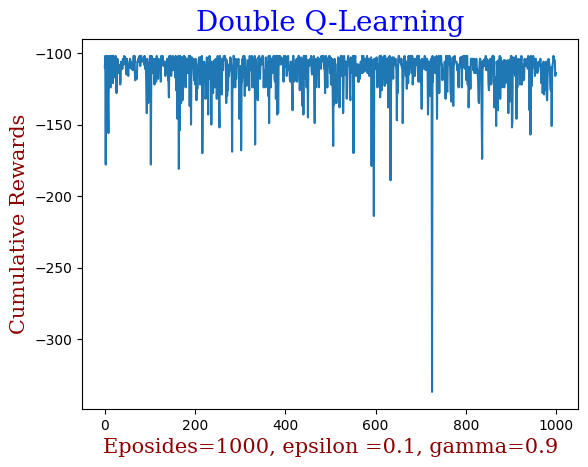

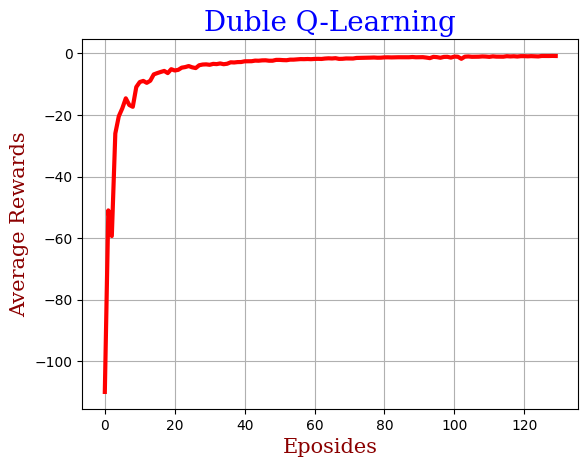

In [35]:
a=1
b=np.zeros([1000])
for i in range(0,1000):

    b[i]=global_reward[i]/a
    a = a + 1
plt.figure(1)
plt.plot(np.arange(0,1000), global_reward[0:1000])
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Double Q-Learning", fontdict = font1)
plt.xlabel("Eposides=1000, epsilon =0.1, gamma=0.9", fontdict = font2)
plt.ylabel("Cumulative Rewards", fontdict = font2)
plt.figure(2)
plt.plot(np.arange(0,130),b[0:130], color='red', linewidth='3')
plt.title(" Duble Q-Learning ", fontdict = font1)
plt.xlabel("Eposides", fontdict = font2)
plt.ylabel("Average Rewards", fontdict = font2)
plt.grid()

In [119]:
np.where(np.array(cumulative_reward)==np.max(np.array(cumulative_reward)))

(array([8797]),)

In [120]:
np.min(np.array(cumulative_reward))

-291.0

In [121]:
np.max(global_reward)

-10.0

In [150]:
np.random.choice(np.arange(0,4,1))

0